In [2]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster, cophenet
from scipy.spatial.distance import pdist

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

this is only for A clusters in homogenuos clusters

In [9]:
homogenuous_clusters_archaea = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/homogenuous_clusters_archaea.tsv')
homogenuous_clusters_bacteria = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/homogenuous_clusters_bacteria.tsv')
pf_counts = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pf_counts.tsv')

In [12]:
archaea = homogenuous_clusters_archaea\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.merge(pf_counts, on='cluster')[['cluster', 'id', 'description', 'count_a', 'protein_count']]

archaea

cluster      id                                        description  \
0         1  K09909                            uncharacterized protein   
1         1  K12706               novobiocin biosynthesis protein NovC   
2         2  K16195  eukaryotic translation initiation factor 2-alp...   
3         3  K14495                                 F-box protein GID2   
4       193  K22554                 acyl-coenzyme A thioesterase THEM5   
5       194  K24356                            collagen type XXV alpha   
6       195  K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
7       196  K17633                       RAS protein activator-like 2   
8       196  K21691                resuscitation-promoting factor RpfE   
9       197  K05615  solute carrier family 1 (neutral amino acid tr...   
10      198  K15198          transcription factor TFIIIB component B''   
11      199  K13546                    2-deoxy-scyllo-inosose synthase   
12      200  K11234                      mating pheromone alpha-factor   
13      201  K16158       methane monooxygenase component A beta chain   
14      202  K10742        DNA replication ATP-dependent helicase Dna2   
15      202  K19036             ATP-dependent RNA/DNA helicase IGHMBP2   
16      202  K23498                       peptide chain release factor   
17      203  K19543               aminoglycoside 3'-phosphotransferase   
18      204  K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...   
19      235  K10436       microtubule-associated protein, RP/EB family   

    count_a  protein_count  
0         4              5  
1         4             48  
2         2             15  
3         4            377  
4         1              7  
5         1              5  
6         1             38  
7         1              3  
8         1              5  
9         1              5  
10        1              5  
11        1              7  
12        1            153  
13        1              7  
14        1             10  
15        1             10  
16        1             10  
17        1             25  
18        1              7  
19        1             94

In [57]:
ids_archaea = archaea.groupby(['id', 'description'], as_index=False)\
.agg({'count_a':'sum'}).merge(archaea[['id', 'cluster','protein_count']], on='id')\
.rename(columns={'cluster':'cluster_id',
                'count_a':'PF_count'})[['cluster_id', 'id', 'description', 'PF_count', 'protein_count']]\
.sort_values('cluster_id')

ids_archaea

cluster_id      id                                        description  \
3            1  K09909                            uncharacterized protein   
7            1  K12706               novobiocin biosynthesis protein NovC   
12           2  K16195  eukaryotic translation initiation factor 2-alp...   
9            3  K14495                                 F-box protein GID2   
17         193  K22554                 acyl-coenzyme A thioesterase THEM5   
19         194  K24356                            collagen type XXV alpha   
1          195  K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
13         196  K17633                       RAS protein activator-like 2   
16         196  K21691                resuscitation-promoting factor RpfE   
2          197  K05615  solute carrier family 1 (neutral amino acid tr...   
10         198  K15198          transcription factor TFIIIB component B''   
8          199  K13546                    2-deoxy-scyllo-inosose synthase   
6          200  K11234                      mating pheromone alpha-factor   
11         201  K16158       methane monooxygenase component A beta chain   
18         202  K23498                       peptide chain release factor   
14         202  K19036             ATP-dependent RNA/DNA helicase IGHMBP2   
5          202  K10742        DNA replication ATP-dependent helicase Dna2   
15         203  K19543               aminoglycoside 3'-phosphotransferase   
0          204  K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...   
4          235  K10436       microtubule-associated protein, RP/EB family   

    PF_count  protein_count  
3          4              5  
7          4             48  
12         2             15  
9          4            377  
17         1              7  
19         1              5  
1          1             38  
13         1              3  
16         1              5  
2          1              5  
10         1              5  
8          1              7  
6          1            153  
11         1              7  
18         1             10  
14         1             10  
5          1             10  
15         1             25  
0          1              7  
4          1             94

In [14]:
archaea.id.nunique()

20

In [13]:
bacteria = homogenuous_clusters_bacteria\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.merge(pf_counts, on='cluster')[['cluster', 'id', 'description', 'count_b', 'protein_count']]

bacteria

cluster      id                                        description  \
0          5  K19082  two-component system, OmpR family, response re...   
1          6  K23498                       peptide chain release factor   
2          7  K19082  two-component system, OmpR family, response re...   
3          9  K17465          D-glucosaminate PTS system EIIB component   
4         10  K19082  two-component system, OmpR family, response re...   
..       ...     ...                                                ...   
247      233  K18987  two-component system, OmpR family, response re...   
248      233  K19082  two-component system, OmpR family, response re...   
249      234  K19082  two-component system, OmpR family, response re...   
250      236  K17465          D-glucosaminate PTS system EIIB component   
251      237  K19082  two-component system, OmpR family, response re...   

     count_b  protein_count  
0          2             61  
1          3            489  
2          2             82  
3          2             92  
4          2             71  
..       ...            ...  
247        1             12  
248        1             15  
249        1             50  
250        1             27  
251        1             20  

[252 rows x 5 columns]

In [21]:
bacteria.id.nunique()

42

In [63]:
ids_bacteria = bacteria.groupby(['id', 'description'], as_index=False)\
.agg({'count_b':'sum',
     'protein_count':'sum'})\
.rename(columns={'count_b':'PF_count'})

ids_bacteria

id                                        description  PF_count  \
0   K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...        21   
1   K02123      V/A-type H+/Na+-transporting ATPase subunit I         1   
2   K02201          pantetheine-phosphate adenylyltransferase         1   
3   K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2         1   
4   K02415                             flagellar protein FliL         1   
5   K02794                 mannose PTS system EIIAB component         2   
6   K02813                  sorbose PTS system EIIB component         8   
7   K03430      2-aminoethylphosphonate-pyruvate transaminase         1   
8   K03646                    colicin import membrane protein         1   
9   K03841                      fructose-1,6-bisphosphatase I         2   
10  K05614  solute carrier family 1 (glial high affinity g...         1   
11  K05615  solute carrier family 1 (neutral amino acid tr...         1   
12  K07668  two-component system, OmpR family, response re...         8   
13  K09469      2-aminoethylphosphonate-pyruvate transaminase         1   
14  K09774      lipopolysaccharide export system protein LptA         1   
15  K10436       microtubule-associated protein, RP/EB family         3   
16  K11195                 fructose PTS system EIIB component         2   
17  K11234                      mating pheromone alpha-factor         1   
18  K11615  two-component system, CitB family, response re...         1   
19  K11630  two-component system, OmpR family, bacitracin ...       136   
20  K11634  two-component system, OmpR family, response re...         3   
21  K12706               novobiocin biosynthesis protein NovC         1   
22  K13546                    2-deoxy-scyllo-inosose synthase         1   
23  K14495                                 F-box protein GID2         1   
24  K15198          transcription factor TFIIIB component B''         1   
25  K16158       methane monooxygenase component A beta chain         1   
26  K16195  eukaryotic translation initiation factor 2-alp...         1   
27  K16617                           collagen type XIII alpha         1   
28  K17465          D-glucosaminate PTS system EIIB component       116   
29  K18073  two-component system, OmpR family, response re...         2   
30  K18344  two-component system, OmpR family, response re...       123   
31  K18987  two-component system, OmpR family, response re...         1   
32  K19012  lymphatic vessel endothelial hyaluronan recept...         1   
33  K19078  two-component system, OmpR family, response re...       155   
34  K19082  two-component system, OmpR family, response re...       331   
35  K19425                           glycosyltransferase EpsH         1   
36  K19543               aminoglycoside 3'-phosphotransferase         1   
37  K21691                resuscitation-promoting factor RpfE         1   
38  K22554                 acyl-coenzyme A thioesterase THEM5         1   
39  K23285  PTB domain-containing engulfment adapter prote...         1   
40  K23498                       peptide chain release factor         5   
41  K24356                            collagen type XXV alpha         1   

    protein_count  
0            1247  
1              35  
2               3  
3              17  
4               6  
5              45  
6              37  
7              22  
8              45  
9               4  
10             44  
11             16  
12             89  
13             22  
14            134  
15             52  
16             10  
17             53  
18              8  
19             66  
20             20  
21             25  
22             32  
23             22  
24             17  
25             23  
26             26  
27              2  
28           4400  
29              1  
30             13  
31             12  
32              4  
33            114  
34          13901  
35             21  
36             28  
37             39  
38

In [108]:
plot_data = ids_archaea.merge(ids_bacteria, on='id')\
.rename(columns={
    'PF_count_x':'PF_count_a',
    'PF_count_y':'PF_count_b',
    'protein_count_x':'protein_count_a',
    'protein_count_y':'protein_count_b',
    'description_x':'description'
})[['cluster_id', 'id', 'description', 'PF_count_a', 'protein_count_a', 'PF_count_b', 'protein_count_b']]

plot_data

cluster_id      id                                        description  \
0            1  K12706               novobiocin biosynthesis protein NovC   
1            2  K16195  eukaryotic translation initiation factor 2-alp...   
2            3  K14495                                 F-box protein GID2   
3          193  K22554                 acyl-coenzyme A thioesterase THEM5   
4          194  K24356                            collagen type XXV alpha   
5          195  K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
6          196  K21691                resuscitation-promoting factor RpfE   
7          197  K05615  solute carrier family 1 (neutral amino acid tr...   
8          198  K15198          transcription factor TFIIIB component B''   
9          199  K13546                    2-deoxy-scyllo-inosose synthase   
10         200  K11234                      mating pheromone alpha-factor   
11         201  K16158       methane monooxygenase component A beta chain   
12         202  K23498                       peptide chain release factor   
13         203  K19543               aminoglycoside 3'-phosphotransferase   
14         204  K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...   
15         235  K10436       microtubule-associated protein, RP/EB family   

    PF_count_a  protein_count_a  PF_count_b  protein_count_b  
0            4               48           1               25  
1            2               15           1               26  
2            4              377           1               22  
3            1                7           1               45  
4            1                5           1               28  
5            1               38           1               17  
6            1                5           1               39  
7            1                5           1               16  
8            1                5           1               17  
9            1                7           1               32  
10           1              153           1               53  
11           1                7           1               23  
12           1               10           5              680  
13           1               25           1               28  
14           1                7          21             1247  
15           1               94           3               52

<BarContainer object of 16 artists>

<BarContainer object of 16 artists>

Text(0, 0.5, 'protein counts')

Text(0.5, 1.0, 'Relative abundance of \narchaeal and bacterial proteins across common KO ids')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

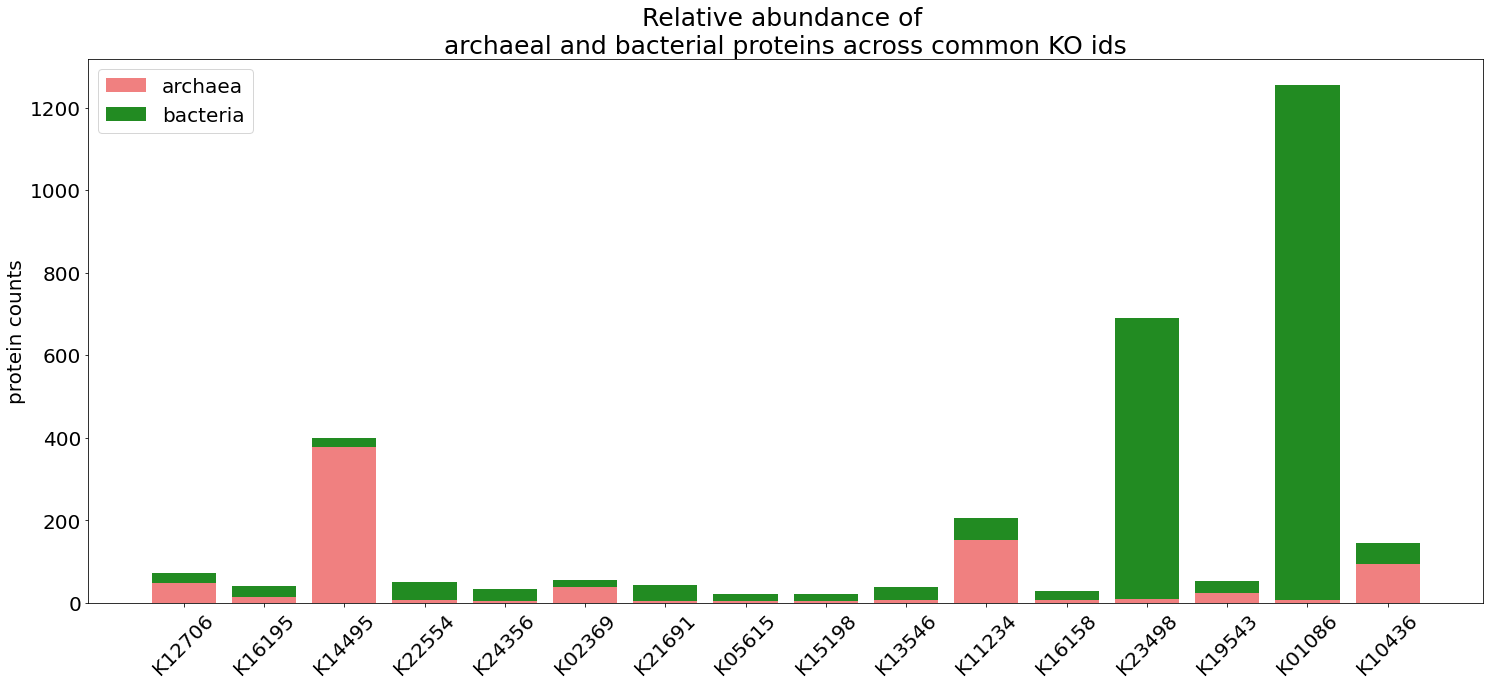

In [121]:
labels = plot_data.id
width = 0.6
bottoms = plot_data.protein_count_a

fig, ax = plt.subplots()

fig.set_figwidth(25)
fig.set_figheight(10)

ax.bar(labels, plot_data.protein_count_a, label='archaea', color = 'lightcoral')
ax.bar(labels, plot_data.protein_count_b, bottom=bottoms,  label='bacteria', color = 'forestgreen')

ax.set_ylabel('protein counts', fontsize = 20)

ax.set_title('Relative abundance of \narchaeal and bacterial proteins across common KO ids', fontsize = 25)
ax.legend(fontsize = 20)

plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 20)

plt.show()

## inspect all clusters

In [4]:
all_clusters = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/all_clusters_dendrogram.tsv')


In [9]:
all_clusters[all_clusters.ids.str.startswith("a")]

cluster  count_a  count_b  count  ratio_a2all  ratio_b2all       ids  \
0            1        4        0      4          1.0          0.0  a_135737   
1            1        4        0      4          1.0          0.0  a_135737   
2            1        4        0      4          1.0          0.0  a_135737   
3            1        4        0      4          1.0          0.0  a_135737   
4            1        4        0      4          1.0          0.0  a_135737   
...        ...      ...      ...    ...          ...          ...       ...   
23443      235        1        0      1          1.0          0.0   a_37787   
23444      235        1        0      1          1.0          0.0   a_37787   
23445      235        1        0      1          1.0          0.0   a_37787   
23446      235        1        0      1          1.0          0.0   a_37787   
23447      235        1        0      1          1.0          0.0   a_37787   

                           protein      id  \
0       GUT_GENOME139173.fasta_357  K12706   
1       GUT_GENOME105868.fasta_196  K12706   
2       GUT_GENOME104819.fasta_673  K12706   
3       GUT_GENOME048336.fasta_939  K12706   
4       GUT_GENOME280278.fasta_484  K12706   
...                            ...     ...   
23443  GUT_GENOME273866.fasta_1312  K10436   
23444   GUT_GENOME244876.fasta_571  K10436   
23445  GUT_GENOME093215.fasta_1369  K10436   
23446   GUT_GENOME024578.fasta_508  K10436   
23447  GUT_GENOME018729.fasta_1321  K10436   

                                        description  
0              novobiocin biosynthesis protein NovC  
1              novobiocin biosynthesis protein NovC  
2              novobiocin biosynthesis protein NovC  
3              novobiocin biosynthesis protein NovC  
4              novobiocin biosynthesis protein NovC  
...                                             ...  
23443  microtubule-associated protein, RP/EB family  
23444  microtubule-associated protein, RP/EB family  
23445  microtubule-associated protein, RP/EB family  
23446  microtubule-associated protein, RP/EB family  
23447  microtubule-associated protein, RP/EB family  

[869 rows x 10 columns]

In [23]:
all_clusters[['cluster', 'id']]

cluster        ids      id
0            1   a_135737  K12706
1            1   a_135737  K12706
2            1   a_135737  K12706
3            1   a_135737  K12706
4            1   a_135737  K12706
...        ...        ...     ...
23490      237  b_2720951  K19082
23491      237  b_2720951  K19082
23492      237  b_2720951  K19082
23493      237  b_2720951  K19082
23494      237  b_2720951  K19082

[23495 rows x 3 columns]

In [32]:
all_a = all_clusters[all_clusters.ids.str.startswith("a")]\
.groupby(['id', 'cluster', 'description'], as_index=False)\
.agg({'protein':'count'})

In [174]:
all_a

id  cluster                                        description  \
0   K01086      204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
1   K02369      195    alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
2   K05615      197  solute carrier family 1 (neutral amino acid tr...   
3   K09469       15      2-aminoethylphosphonate-pyruvate transaminase   
4   K09909        1                            uncharacterized protein   
5   K10436      235       microtubule-associated protein, RP/EB family   
6   K10742      202        DNA replication ATP-dependent helicase Dna2   
7   K11234      200                      mating pheromone alpha-factor   
8   K12706        1               novobiocin biosynthesis protein NovC   
9   K13546      199                    2-deoxy-scyllo-inosose synthase   
10  K14495        3                                 F-box protein GID2   
11  K15198      198          transcription factor TFIIIB component B''   
12  K16158      201       methane monooxygenase component A beta chain   
13  K16195        2  eukaryotic translation initiation factor 2-alp...   
14  K17465       61          D-glucosaminate PTS system EIIB component   
15  K17633      196                       RAS protein activator-like 2   
16  K19036      202             ATP-dependent RNA/DNA helicase IGHMBP2   
17  K19082        8  two-component system, OmpR family, response re...   
18  K19481        4                                 matrix Gla protein   
19  K19543      203               aminoglycoside 3'-phosphotransferase   
20  K21691      196                resuscitation-promoting factor RpfE   
21  K22554      193                 acyl-coenzyme A thioesterase THEM5   
22  K23498      202                       peptide chain release factor   
23  K24356      194                            collagen type XXV alpha   

    protein  
0         7  
1        38  
2         5  
3        12  
4         5  
5        94  
6        10  
7       153  
8        48  
9         7  
10      377  
11        5  
12        7  
13       15  
14        6  
15        3  
16       10  
17        8  
18        7  
19       25  
20        5  
21        7  
22       10  
23        5

In [193]:
# df = all_a.rename(columns={'protein':'protein_count'})\
# .sort_values('cluster')[['cluster', 'id', 'description', 'protein_count']]

# df[(df.id == 'K02369') | (df.id == 'K09469') 
#                             | (df.id == 'K10436') 
#                             | (df.id == 'K11234') 
#                                  | (df.id == 'K13546')]

In [202]:
plot_data[(plot_data.id == 'K02369') | (plot_data.id == 'K10436') 
                            | (plot_data.id == 'K11234') 
                            | (plot_data.id == 'K12706') 
                                 | (plot_data.id == 'K14495')]

id  cluster_a                                      description  \
1  K02369        195  alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
4  K10436        235     microtubule-associated protein, RP/EB family   
5  K11234        200                    mating pheromone alpha-factor   
6  K12706          1             novobiocin biosynthesis protein NovC   
8  K14495          3                               F-box protein GID2   

   protein_count_a  protein_count_b     ratio  
1               38               17  0.690909  
4               94               52  0.643836  
5              153               53  0.742718  
6               48               25  0.657534  
8              377               22  0.944862

In [34]:
all_b = all_clusters[all_clusters.ids.str.startswith("b")]\
.groupby(['id', 'cluster', 'description'], as_index=False)\
.agg({'protein':'count'})

In [35]:
all_a.merge(all_b, on='id')

id  cluster_x                                      description_x  \
0    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
1    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
2    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
3    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
4    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
..      ...        ...                                                ...   
216  K22554        193                 acyl-coenzyme A thioesterase THEM5   
217  K23498        202                       peptide chain release factor   
218  K23498        202                       peptide chain release factor   
219  K23498        202                       peptide chain release factor   
220  K24356        194                            collagen type XXV alpha   

     protein_x  cluster_y                                      description_y  \
0            7         21  fructose-1,6-bisphosphatase I / sedoheptulose-...   
1            7         22  fructose-1,6-bisphosphatase I / sedoheptulose-...   
2            7         23  fructose-1,6-bisphosphatase I / sedoheptulose-...   
3            7         24  fructose-1,6-bisphosphatase I / sedoheptulose-...   
4            7         25  fructose-1,6-bisphosphatase I / sedoheptulose-...   
..         ...        ...                                                ...   
216          7        210                 acyl-coenzyme A thioesterase THEM5   
217         10          6                       peptide chain release factor   
218         10        208                       peptide chain release factor   
219         10        213                       peptide chain release factor   
220          5        219                            collagen type XXV alpha   

     protein_y  
0           90  
1          863  
2          136  
3           38  
4           50  
..         ...  
216         45  
217        489  
218         28  
219        163  
220         28  

[221 rows x 7 columns]

In [112]:
plot_data = all_a.merge(all_b, on='id')\
.rename(columns={
    'protein_x':'protein_count_a',
    'protein_y':'protein_count_b',
    'description_x':'description',
    'cluster_x':'cluster_a'
})[['id', 'cluster_a', 'description', 'protein_count_a', 'protein_count_b']].sort_values('cluster_a')

plot_data

id  cluster_a                                        description  \
15   K12706          1               novobiocin biosynthesis protein NovC   
20   K16195          2  eukaryotic translation initiation factor 2-alp...   
17   K14495          3                                 F-box protein GID2   
213  K19481          4                                 matrix Gla protein   
110  K19082          8  two-component system, OmpR family, response re...   
..      ...        ...                                                ...   
3    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
0    K01086        204  fructose-1,6-bisphosphatase I / sedoheptulose-...   
11   K10436        235       microtubule-associated protein, RP/EB family   
12   K10436        235       microtubule-associated protein, RP/EB family   
13   K10436        235       microtubule-associated protein, RP/EB family   

     protein_count_a  protein_count_b  
15                48               25  
20                15               26  
17               377               22  
213                7               16  
110                8               26  
..               ...              ...  
3                  7               38  
0                  7               90  
11                94               20  
12                94                9  
13                94               23  

[221 rows x 5 columns]

In [113]:
plot_data = plot_data.groupby(['id', 'cluster_a', 'description', 'protein_count_a'], as_index=False)\
.agg({'protein_count_b':'sum'})

plot_data['ratio'] = plot_data.protein_count_a/(plot_data.protein_count_a + plot_data.protein_count_b)

In [194]:
labels = plot_data.id
width = 0.6

data_a = plot_data.protein_count_a
data_b = plot_data.protein_count_b


fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(15)

mask1 = list((plot_data.cluster_a != 4) & (plot_data.cluster_a != 8) & (plot_data.cluster_a != 15) & (plot_data.cluster_a != 61))
mask2 = list((plot_data.cluster_a == 4) | (plot_data.cluster_a == 8) | (plot_data.cluster_a == 15) | (plot_data.cluster_a == 61))

# bottoms = data_a[mask1]

ax.bar(labels[mask1], data_a[mask1], label='archaea_homogeneous_clusters', color = 'lightcoral')
ax.bar(labels[mask2], data_a[mask2], label='archaea_heterogeneous_clusters', color = 'deeppink')
ax.bar(labels[mask1], data_b[mask1], bottom=data_a[mask1],  label='bacteria_heterogeneous_clusters', color = 'forestgreen')
ax.bar(labels[mask2], data_b[mask2], bottom=data_a[mask2],  label='bacteria_heterogeneous_clusters', color = 'lightseagreen')

ax.set_ylabel('protein counts', fontsize = 15)

ax.set_title('Amount of archaeal and\nbacterial proteins across common KO ids', fontsize = 25)
ax.legend(fontsize = 15)

plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)

plt.show()

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'protein counts')

Text(0.5, 1.0, 'Amount of archaeal and\nbacterial proteins across common KO ids')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text major ticklabel objects>)

In [136]:
labels = plot_data.id
width = 0.6

fig, ax = plt.subplots()

fig.set_figwidth(20)
fig.set_figheight(10)

data = plot_data.ratio

mask1 = list((plot_data.cluster_a != 4) & (plot_data.cluster_a != 8) & (plot_data.cluster_a != 15) & (plot_data.cluster_a != 61))
mask2 = list((plot_data.cluster_a == 4) | (plot_data.cluster_a == 8) | (plot_data.cluster_a == 15) | (plot_data.cluster_a == 61))

# bottoms = data_a[mask1]

ax.bar(labels[mask1], data[mask1], label='archaea_homogeneous_clusters', color = 'lightcoral')
ax.bar(labels[mask2], data[mask2], label='archaea_heterogeneous_clusters', color = 'deeppink')

plt.axhline(y=0.5, color='y', linestyle='-.')

ax.set_ylabel('ratio arcaheal/bacterial proteins', fontsize = 15)

ax.set_title('Relative abundance of archaeal and bacterial\nproteins across proteins with common KO ids', fontsize = 25)
ax.legend(fontsize = 15)

plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)

plt.show()

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'ratio arcaheal/bacterial proteins')

Text(0.5, 1.0, 'Relative abundance of archaeal and bacterial\nproteins across proteins with common KO ids')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

In [201]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Relative abundance of archaeal and bacterial proteins across proteins with common KO ids',
            fontsize = 20)
fig.set_figwidth(20)
fig.set_figheight(25)

fig.subplots_adjust(hspace=0.2)

mask1 = list((plot_data.cluster_a != 4) & (plot_data.cluster_a != 8) & (plot_data.cluster_a != 15) & (plot_data.cluster_a != 61))
mask2 = list((plot_data.cluster_a == 4) | (plot_data.cluster_a == 8) | (plot_data.cluster_a == 15) | (plot_data.cluster_a == 61))

# ax1

ax1.bar(labels[mask1], data_a[mask1], label='archaea_homogeneous_clusters', color = 'lightcoral')
ax1.bar(labels[mask2], data_a[mask2], label='archaea_heterogeneous_clusters', color = 'deeppink')
ax1.bar(labels[mask1], data_b[mask1], bottom=data_a[mask1],  label='bacteria_heterogeneous_clusters', color = 'forestgreen')
ax1.bar(labels[mask2], data_b[mask2], bottom=data_a[mask2],  label='bacteria_heterogeneous_clusters', color = 'lightseagreen')

ax1.set_ylabel('Protein amount', fontsize = 15)

ax1.set_title('Absolute amnount of archaeal and bacterial proteins with common KO ids', fontsize = 15)
ax1.legend(fontsize = 15)
ax1.set_xticklabels(labels[mask1].append(labels[mask2]), rotation=45)
ax1.tick_params(axis='both', which='major', labelsize=15)

# ax2

ax2.bar(labels[mask1], data[mask1], label='archaea_homogeneous_clusters', color = 'lightcoral')
ax2.bar(labels[mask2], data[mask2], label='archaea_heterogeneous_clusters', color = 'deeppink')
plt.axhline(y=0.5, color='y', linestyle='-.')

ax2.set_ylabel('Ratio arcaheal/bacterial proteins', fontsize = 15)

ax2.set_title('Protein ratio for each KO id', fontsize = 15)
ax2.legend(fontsize = 15)

ax2.set_xticklabels(labels[mask1].append(labels[mask2]), rotation=45)
ax2.tick_params(axis='both', which='major', labelsize=15)



Text(0.5, 0.98, 'Relative abundance of archaeal and bacterial proteins across proteins with common KO ids')

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'Protein amount')

Text(0.5, 1.0, 'Absolute amnount of archaeal and bacterial proteins with common KO ids')

[Text(0, 0, 'K01086'),
 Text(0, 0, 'K02369'),
 Text(0, 0, 'K05615'),
 Text(0, 0, 'K10436'),
 Text(0, 0, 'K11234'),
 Text(0, 0, 'K12706'),
 Text(0, 0, 'K13546'),
 Text(0, 0, 'K14495'),
 Text(0, 0, 'K15198'),
 Text(0, 0, 'K16158'),
 Text(0, 0, 'K16195'),
 Text(0, 0, 'K19543'),
 Text(0, 0, 'K21691'),
 Text(0, 0, 'K22554'),
 Text(0, 0, 'K23498'),
 Text(0, 0, 'K24356'),
 Text(0, 0, 'K09469'),
 Text(0, 0, 'K17465'),
 Text(0, 0, 'K19082'),
 Text(0, 0, 'K19481')]

<BarContainer object of 16 artists>

<BarContainer object of 4 artists>

Text(0, 0.5, 'Ratio arcaheal/bacterial proteins')

Text(0.5, 1.0, 'Protein ratio for each KO id')

[Text(0, 0, 'K01086'),
 Text(0, 0, 'K02369'),
 Text(0, 0, 'K05615'),
 Text(0, 0, 'K10436'),
 Text(0, 0, 'K11234'),
 Text(0, 0, 'K12706'),
 Text(0, 0, 'K13546'),
 Text(0, 0, 'K14495'),
 Text(0, 0, 'K15198'),
 Text(0, 0, 'K16158'),
 Text(0, 0, 'K16195'),
 Text(0, 0, 'K19543'),
 Text(0, 0, 'K21691'),
 Text(0, 0, 'K22554'),
 Text(0, 0, 'K23498'),
 Text(0, 0, 'K24356'),
 Text(0, 0, 'K09469'),
 Text(0, 0, 'K17465'),
 Text(0, 0, 'K19082'),
 Text(0, 0, 'K19481')]